# Discrete Distributions or Probability Mass Functions (PMFs)

Probability distribution is a function that generates the probabilities of occurrence of all possible outcomes in an experiment. Consider an experiement of rolling of the die. If the random variable X is used to denote the outcome of the die roll, then the probability distribution of X would take the value $\frac{1}{6}$ for $X \to \{1, 2, 3, 4, 5, 6\}$.


## Bernoulli Distribution

Bernoulli distribution is the probability distribution of a random variable that takes a boolean value such as a 1 or 0. The Probability Mass Function of Bernoulli distribution is mathematically defined as:

For a possible outcome k, 

$$f(k,p) = {p^k}({{1-p})^{(1-k)}} $$


where p is the probability of outcome 1 and 1-p is the probability of outcome 0.<br>

### Examples

Result of a coin toss, if patient has disease or not, any experiment with outcome of success or failure.


<img src="../images/bernoulli.png" style="width: 700px;">


Let us now plot a Bernoulli distribution

### Exercise

* Increase number of samples to 1000 and use bernoulli.stats() function to determine the mean of the distribution.
* Assign it to variable, mu and print it out.

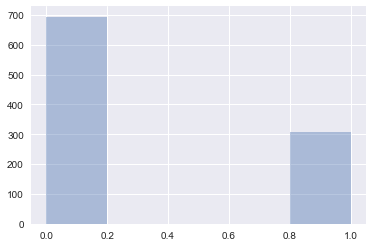

In [19]:
%matplotlib inline
from scipy.stats import bernoulli
import numpy as np
import seaborn as sns

p = 0.3
x = bernoulli.rvs(p, size=1000)
sns.distplot(x, kde=False);

Use stats function.

In [20]:
mu = bernoulli.stats(p, moments='m')
print(mu)

0.3


In [21]:
ref_tmp_var = False

try:
    if mu == 0.3:
        ref_assert_var = True
        ref_tmp_var = True
    else:
        ref_assert_var = False
        print('Please follow the instructions given and use the same variables provided in the instructions.')
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')

assert ref_tmp_var

continue



<br/><br/><br/>
## Binomial Distribution

The number of successes, $x$ in a fixed number of $n$ independent Bernoulli trials with probability of success $p$ or $\theta$, follows a binomial distribution. $n$ and $p$ are always fixed in a binomial distribution.


<img src="../images/binomial.png" style="width: 700px;">


### Examples

Number of heads after tossing a coin 100 times. Number of defective bulbs after inspecting 1000 bulbs.


### Exercise

Let us generate numbers that conform to a binomial distribution. Given N = 40, p=0.5 and the numbers distributed according to the binomial pmf, compute the mean and variance and assign it to variables, mu and var.

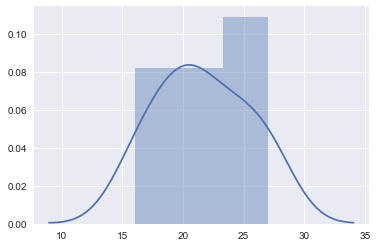

In [22]:
%matplotlib inline

import numpy as np
import seaborn as sns

N = 40
p = 0.5
binomial_x = np.random.binomial(N, p, 10)
sns.distplot(binomial_x)

# Compute mean and variance

Use formula for mu & var.

In [23]:
mu = N*p
var = N*p*(1-p)
print(mu, var)

20.0 10.0


In [24]:
ref_tmp_var = False

try:
    if (mu==20.0) and (var==10.0):
        ref_assert_var = True
        ref_tmp_var = True
    else:
        ref_assert_var = False
        print('Please follow the instructions given and use the same variables provided in the instructions.')
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')

assert ref_tmp_var

continue


### Coin toss experiment

Let us consider an experiment of tossing a biased coin, in which p is the probability of 'heads' and n is the number of tosses. An experiment is defined as a series of trials. In this case, an experiment will consist of n trials/tosses. We will repeat the experiment 1000 times to simulate the binomial distribution. 

We must check if the experiment follows the assumptions of binomial distribution:

1. Each trial is an independent of the other, meaning outcome of one toss does not affect that of others.
2. There are only two possible outcomes for each trial, heads or tails.
3. The probability of 'success', p is the same across the n trials.
3. The number of trials, n is fixed.

Consider n tosses of a coin. Since the tosses are independent, we can calculate the probability of an outcome by multiplying the individual probabilities in each toss. Probability of 'heads' is p and that of 'tails' is 1-p. Outcome of one experiment with n tosses, has k heads and n-k tails and has probability **p<sup>k</sup>(1-p)<sup>n-k</sup>**.
There are ${n} \choose {k}$ number of distinct n-toss sequences that contain k heads. This forms the binomial coefficient.

Binomial probability mass function (pmf) = ${n} \choose {k}$ **p<sup>k</sup>(1-p)<sup>n-k</sup>**

We can now go ahead and simulate our experiment.

### Exercise

Assume the experiment consists of n=30 coin tosses, the probability of getting heads, p=0.6 and this experiment is repeated 1000 times. Generate a random distribution, k which holds number of heads of each repetition of the experiment. Calculate pmf for each value of k and plot a graph with k and corresponding pmf values. 

In [25]:
%matplotlib inline
import random
from scipy.stats import binom
import matplotlib.pyplot as plt

def toss(p,n):
    heads = 0
    for i in range(n):
        if random.random() < p:
            heads += 1
    return heads #This gives the number of heads in a single experiment of n trials

size = range(1,1001)
n,p = 30,0.6

k = [] #Holds the number of heads from each experiment
pmf= [] #Holds the binomial pmf of each experiment

random.seed(12345)



Use toss function to create list of k values, sort them and for each k, calculate pmf using binom.pmf function. Plot k and pmf to get the distribution plot. 

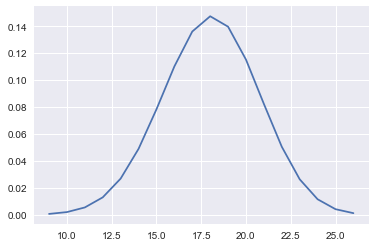

In [26]:
for i in size:
    k.append(toss(p,n))

k.sort()

for i in k:
    pk = binom.pmf(i,n,p)
    pmf.append(pk)

plt.plot(k,pmf) 

In [27]:
ref_tmp_var = False

try:
    head = k[:10]
    prob = pmf[:10]
    ks = [9, 9, 10, 10, 11, 11, 11, 11, 12, 12]
    pmfs = [round(x,4) for x in [0.00063412401653505015, 0.00063412401653505015, 0.0019974906520854141, 0.0019974906520854141, 0.005447701778414739, 0.005447701778414739, 0.005447701778414739, 0.005447701778414739, 0.012938291723735, 0.012938291723735]]
    if ks == head and pmfs == [round(a,4) for a in prob]:
        ref_assert_var = True
        ref_tmp_var = True
    else:
        ref_assert_var = False
        print('Please follow the instructions given and use the same variables provided in the instructions. ')
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions. ')

assert ref_tmp_var

continue


## Cumulative Distributions

Any random variable, whether discrete or continous, may be defined by its cumulative distribution function. CDF of a random variable $X$ is denoted by $F_X(x)$ and gives the cumulative probability upto the value $x$, which is $P(X \leq x)$ for all $x$. In other words, CDF is the proportion of the population having values less than or equal to $x$. 


### Binomial distribution

Consider a binomial random variable $X \sim Binomial(n,\mathrm p)$.<br><br>
Binomial probability mass function, $p_X(x)$ = ${n} \choose {k}$ p<sup>k</sup>(1-p)<sup>n-k</sup>.
$\quad$We can derive the cumulative distribution function as,<br><br> 
$F_X(x) \quad=\quad P(X \leq x) \quad=\quad \sum\limits_{k=0}^{x} p_X(k)$
$\quad=\quad \sum\limits_{k=0}^{x}$ ${n} \choose {k}$ p<sup>k</sup>(1-p)<sup>n-k</sup>

Coin toss is a perfect example of a binomial random variable. Consider tossing a biased coin, in which p is the probability of 'heads'(success), and n is the number of tosses. Let n=10, p=0.8. To find probability of 2 or less successes,<br>
$F_X(x=2) = P_X(X \leq 2) = p_X(0) + p_X(1) + p_X(2)$
<br>

* Given the cdf plot, calculate the probability of occurence of number of heads greater than 6 and assign it to p_x

Probability of 7 successes = 0.201326592
Probability of 7 successes or less = 0.3222004736


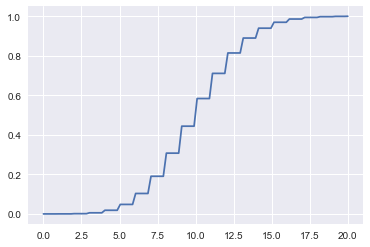

In [28]:
%matplotlib inline
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# Plot cdf of a binomial random variable
x = np.linspace(0,20,100)
cdf = binom.cdf(x, n=50, p=0.2)
plt.plot(x,cdf)

# Read the following example

# Find probability of k = 7 successes, with n=10 and p=0.8
pmf7 = binom.pmf(k=7, n=10, p=0.8)
print("Probability of 7 successes =", pmf7)

# Read the following example

# Find probability of k = 7 successes or less, with n=10 and p=0.8
cdf7 = binom.cdf(k=7, n=10, p=0.8)
print("Probability of 7 successes or less =",cdf7)

# Find probability of k > 6 successes, with n=10 and p=0.8
# p_x =

Read the example solution code given for k=7 and k<=7 successes and compute probability of occurence of greater than 6 heads.

In [29]:
p_x = 1 - binom.cdf(k=6, n=10, p=0.8)
print("Probability of more than 6 successes =", p_x)

Probability of more than 6 successes = 0.8791261184


In [30]:
ref_tmp_var = False

try:
    if abs(p_x - 0.8791) < 0.01:
        ref_assert_var = True
        ref_tmp_var = True
    else:
        ref_assert_var = False
        print('Please follow the instructions given and use the same variables provided in the instructions. ')
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions. ')

assert ref_tmp_var

continue



<br/><br/><br/>
## Geometric Distribution

The number of trials until the first success in a series of Bernoulli trials follows a geometric distribution.


<img src="../images/geometric.png" style="width: 700px;">


### Examples
Number of coin tosses before the first time coin shows head. Number of bulbs tested before the first defective bulb is found. Number of patients screened in hospital before first positive case of a disease.

### Exercise

Let us generate numbers that conform to geometric distribution. Compute mean and variance for the exponential distribution and assign to variables mu and var.

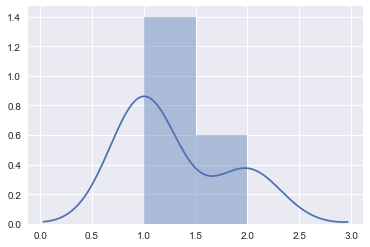

In [31]:
N = 40
p = 0.7

binomial_x = np.random.geometric(0.7, 10)
sns.distplot(binomial_x)

# Compute mean and variance

use formula for mu and var

In [32]:
mu = (1-p)/p
var = (1-p)/p**2

print("Mean: ", mu, "Variance: ", var)

Mean:  0.42857142857142866 Variance:  0.6122448979591838


In [33]:
ref_tmp_var = False

try:
    if (abs(mu - 0.428) < 0.1) and (abs(var - 0.612) < 0.1):
        ref_assert_var = True
        ref_tmp_var = True
    else:
        ref_assert_var = False
        print('Please follow the instructions given and use the same variables provided in the instructions.')
        
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')

assert ref_tmp_var

continue



<br><br/><br/>
## Poisson Distribution

The probability distribution of a Poisson random variable X is the number of events occurring in a given time interval.

Poisson distribution of discrete random variables is defined mathematically as

$$P(X)=e^{-μ}\frac{μ^x} {x!}$$


<img src="../images/poisson.png" style="width: 700px;">


where

X = 0, 1, 2, …

e = 2.71828

μ = mean number of events in the given time interval

### Examples

Number of cars crossing a traffic signal in 30 minutes. Number of phone calls at a service desk in 5 minutes. Number of patients coming into a hospital every hour.

### Exercise

Let us now plot a poisson distribution. 

* Increase number of samples to 1000 and use np.mean function to determine the mean of the distribution.
* Assign it to variable, mu and print it out.

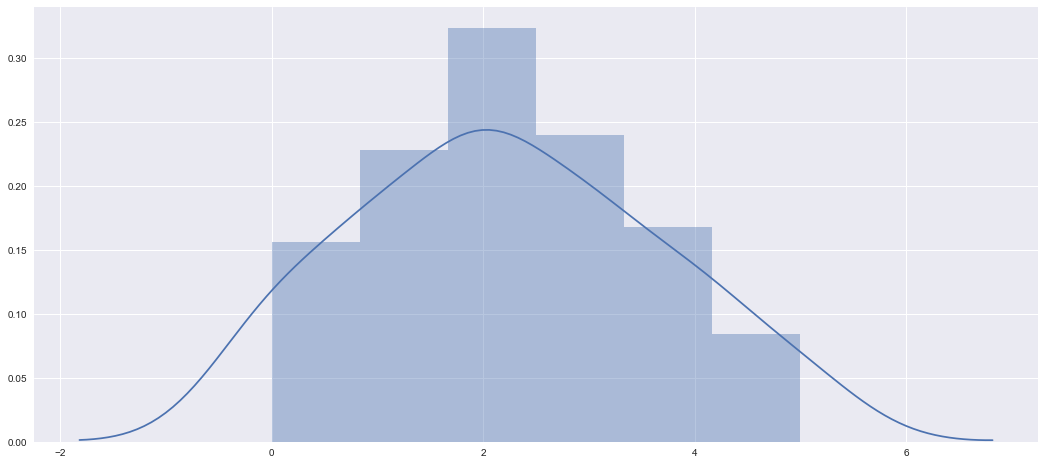

In [34]:
ax = sns.plt.subplots(figsize=(18, 8))
x = np.random.poisson(lam=2, size=100)
sns.distplot(x)

use formula for mu and var.

2.018


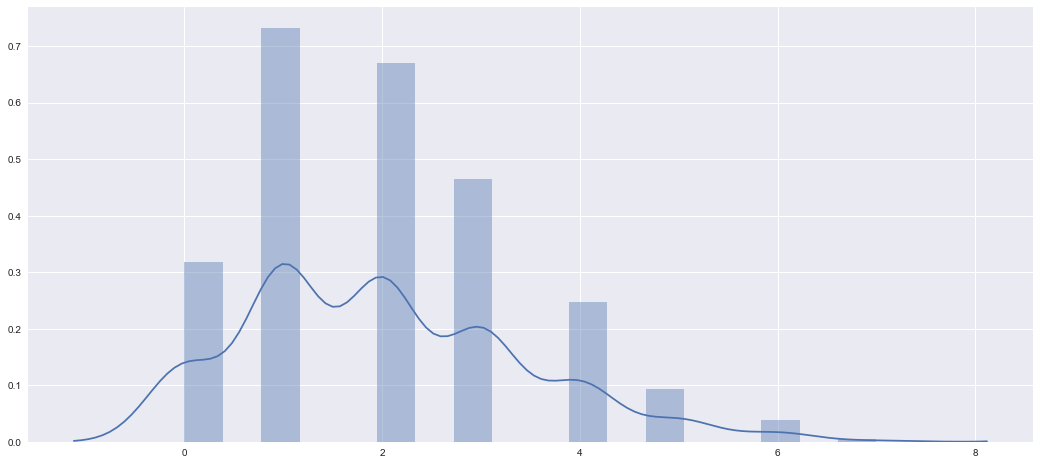

In [35]:
ax = sns.plt.subplots(figsize=(18, 8))
x = np.random.poisson(lam=2, size=1000)
sns.distplot(x)

mu = np.mean(x)
print(mu)

In [36]:
ref_tmp_var = False

try:
    if (abs(mu - 1.921) < 0.25):
        ref_assert_var = True
        ref_tmp_var = True
    else:
        ref_assert_var = False
        print('Please follow the instructions given and use the same variables provided in the instructions.')        
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')   

assert ref_tmp_var

continue
